In [1]:
import os
from tqdm import tqdm 
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# DATA 

In [2]:
stops=pd.read_csv('/kaggle/input/porcodiooo/stops.csv')
stops = stops[
    (stops['LATITUDE'] >= 49.9) & (stops['LATITUDE'] <= 55.8) &
    (stops['LONGITUDE'] >= -6.4) & (stops['LONGITUDE'] <= 1.8)
]

ports=pd.read_csv('/kaggle/input/tutti-i-porti/PORTS.csv')
ports = ports[
    (ports['LATITUDE'] >= 49.9) & (ports['LATITUDE'] <= 55.8) &
    (ports['LONGITUDE'] >= -6.4) & (ports['LONGITUDE'] <= 1.8)
]

# CLUSTERING

In [3]:
X = stops[['LONGITUDE', 'LATITUDE', 'DURATION']].copy()

# Applica DBSCAN a tutto il dataset
dbscan = DBSCAN(eps=0.05, min_samples=10)  # Puoi ottimizzare eps e min_samples
clusters = dbscan.fit_predict(X[['LONGITUDE', 'LATITUDE']])

# Aggiungi i risultati del clustering al dataset originale
stops['cluster'] = clusters

# PLOT

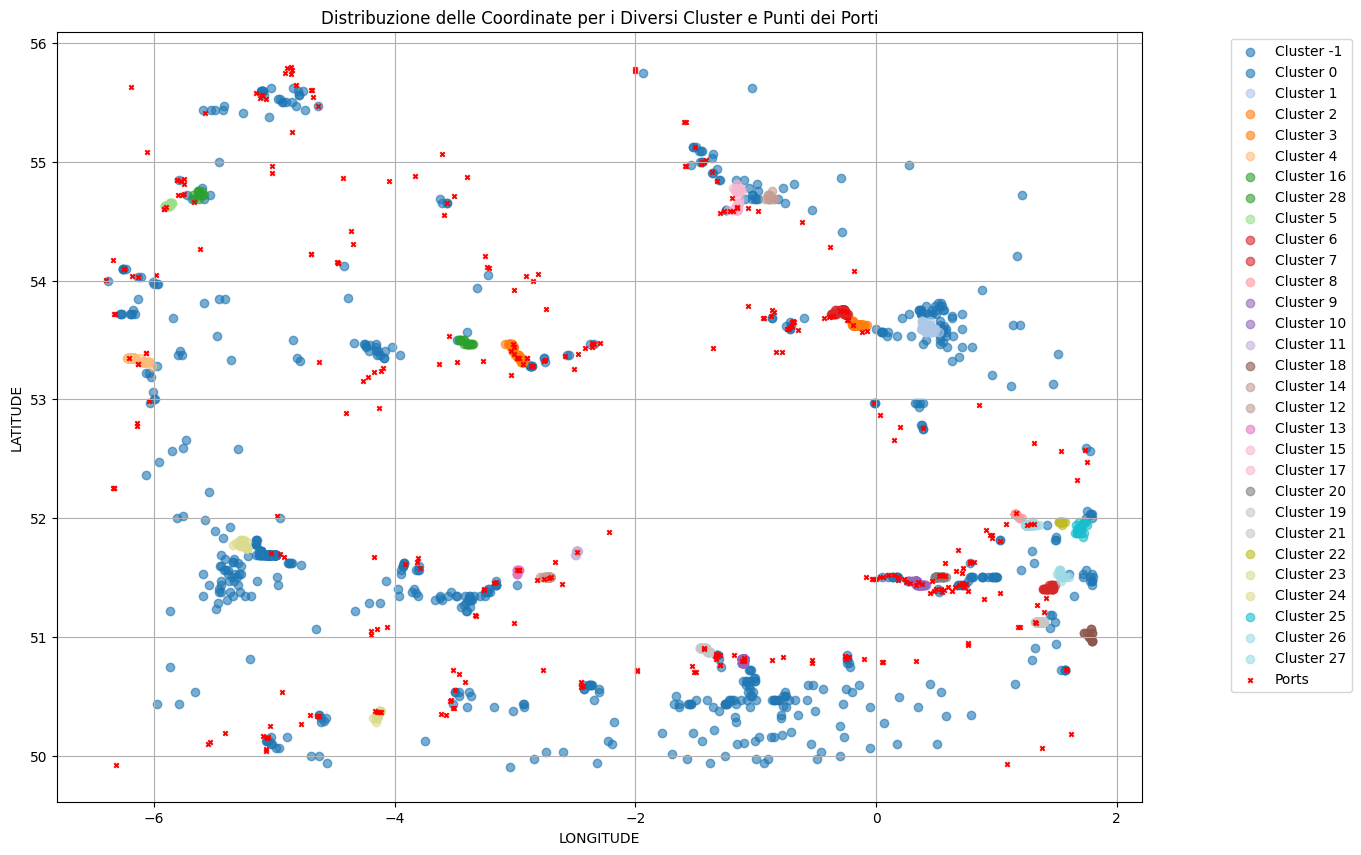

In [4]:


# Supponiamo che tu abbia già il DataFrame 'stops'
clusters = stops['cluster'].unique()

# Usa una mappa di colori da Matplotlib
cmap = plt.get_cmap('tab20', len(clusters))  # 'tab20' è una mappa di colori di base, ma la puoi ampliare con len(clusters)

# Imposta la figura per il grafico
plt.figure(figsize=(14, 10))

# Crea un grafico per ogni cluster
for i, cluster in enumerate(clusters):
    cluster_data = stops[stops['cluster'] == cluster]
    plt.scatter(cluster_data['LONGITUDE'], cluster_data['LATITUDE'], 
                c=[cmap(i)], 
                label=f'Cluster {cluster}', 
                alpha=0.6)

# Aggiungi i punti dei porti
plt.scatter(ports['LONGITUDE'], ports['LATITUDE'], 
            c='red', 
            marker='x', 
            s=10, 
            label='Ports')

# Aggiungi le etichette e il titolo
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.title('Distribuzione delle Coordinate per i Diversi Cluster e Punti dei Porti')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()


# EXPORT

In [5]:
import geopandas as gpd
from shapely.geometry import Point
import os

# Dati d'esempio (sostituisci con il tuo DataFrame 'stops')
# stops = pd.DataFrame({
#     'LONGITUDE': [12.5, 13.5],
#     'LATITUDE': [41.9, 42.9],
#     'STOP_NAME': ['Stop1', 'Stop2']
# })

# Crea la geometria (punti) usando latitudine e longitudine
geometry = [Point(xy) for xy in zip(stops['LONGITUDE'], stops['LATITUDE'])]
gdf = gpd.GeoDataFrame(stops, geometry=geometry)

# Imposta il sistema di riferimento (CRS)
gdf.crs = "EPSG:4326"  # WGS 84

# Crea una cartella per i file di output
output_folder = "shapefile_output"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Esporta il GeoDataFrame come shapefile
output_path = os.path.join(output_folder, "output_shapefile.shp")
gdf.to_file(output_path)

print(f"Shapefile salvato nella cartella: {output_folder}")


Shapefile salvato nella cartella: shapefile_output


# CENTROIDI

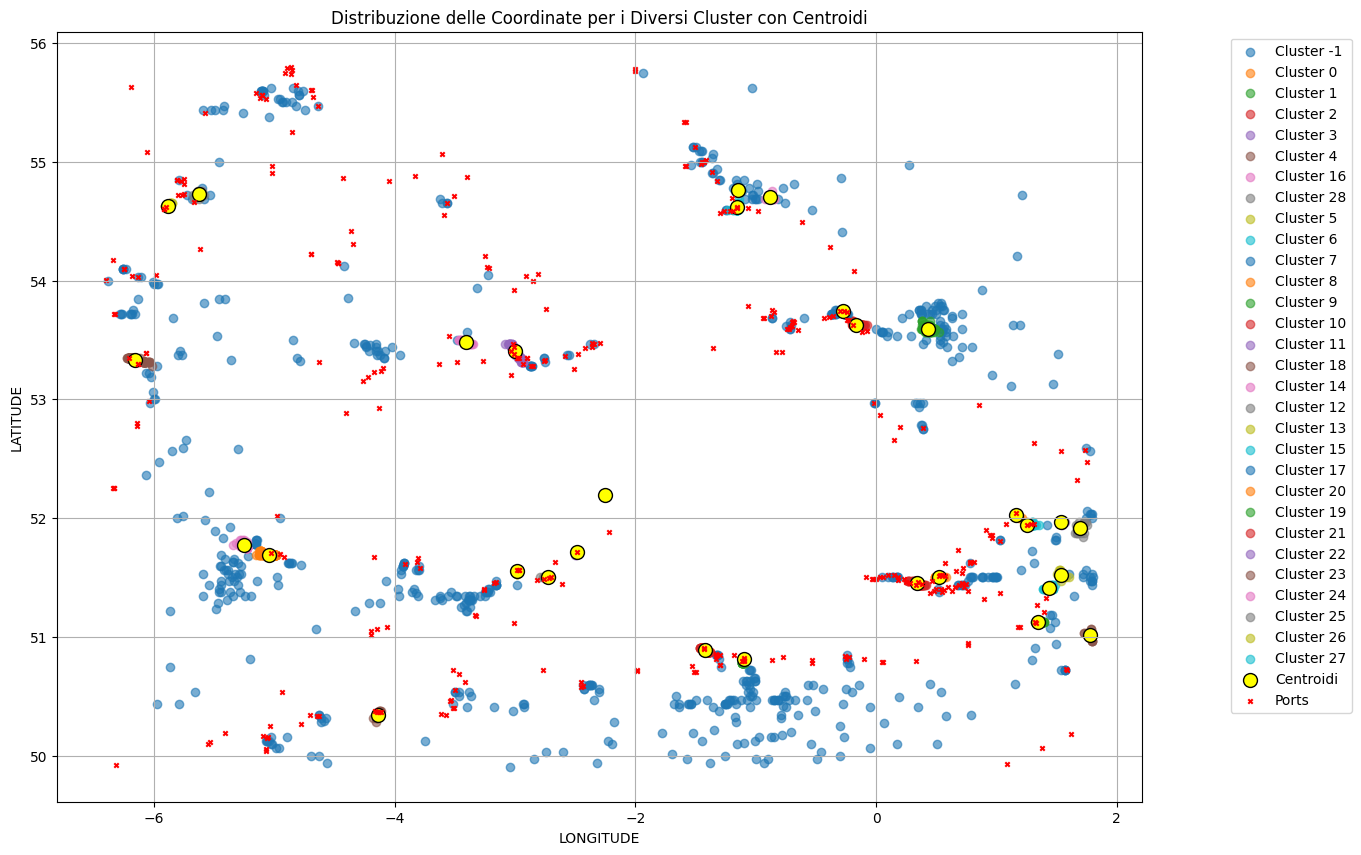

    cluster  CENTROID_LONGITUDE  CENTROID_LATITUDE
0        -1           -2.251109          52.191435
1         0           -5.048496          51.690492
2         1            0.433083          53.595559
3         2           -0.169912          53.625777
4         3           -3.001507          53.404464
5         4           -6.161070          53.334774
6         5           -5.887223          54.631048
7         6            1.438777          51.413462
8         7           -0.278421          53.744853
9         8            1.166199          52.025391
10        9           -1.099734          50.809743
11       10            0.341719          51.456597
12       11           -2.487571          51.713068
13       12           -2.728885          51.500000
14       13           -2.981889          51.551136
15       14           -0.882772          54.700521
16       15           -1.158186          54.619073
17       16           -3.409231          53.480263
18       17           -1.149989

In [5]:

# Trova il centroide per ogni cluster
centroids = stops.groupby('cluster')[['LONGITUDE', 'LATITUDE']].mean().reset_index()
centroids.rename(columns={'LONGITUDE': 'CENTROID_LONGITUDE', 'LATITUDE': 'CENTROID_LATITUDE'}, inplace=True)

# Visualizza i risultati
plt.figure(figsize=(14, 10))

# Grafico dei cluster
for cluster in stops['cluster'].unique():
    cluster_data = stops[stops['cluster'] == cluster]
    plt.scatter(cluster_data['LONGITUDE'], cluster_data['LATITUDE'], 
                label=f'Cluster {cluster}', 
                alpha=0.6)

# Aggiungi i centri dei cluster
plt.scatter(centroids['CENTROID_LONGITUDE'], centroids['CENTROID_LATITUDE'], 
            c='yellow', 
            marker='o', 
            s=100, 
            label='Centroidi', 
            edgecolor='k')

# Aggiungi i punti dei porti
plt.scatter(ports['LONGITUDE'], ports['LATITUDE'], 
            c='red', 
            marker='x', 
            s=10, 
            label='Ports')

# Aggiungi le etichette e il titolo
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.title('Distribuzione delle Coordinate per i Diversi Cluster con Centroidi')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()

# Stampa i centroidi per verifica
print(centroids)


# visualizzazione grafica solo dei centroidi e dei porti

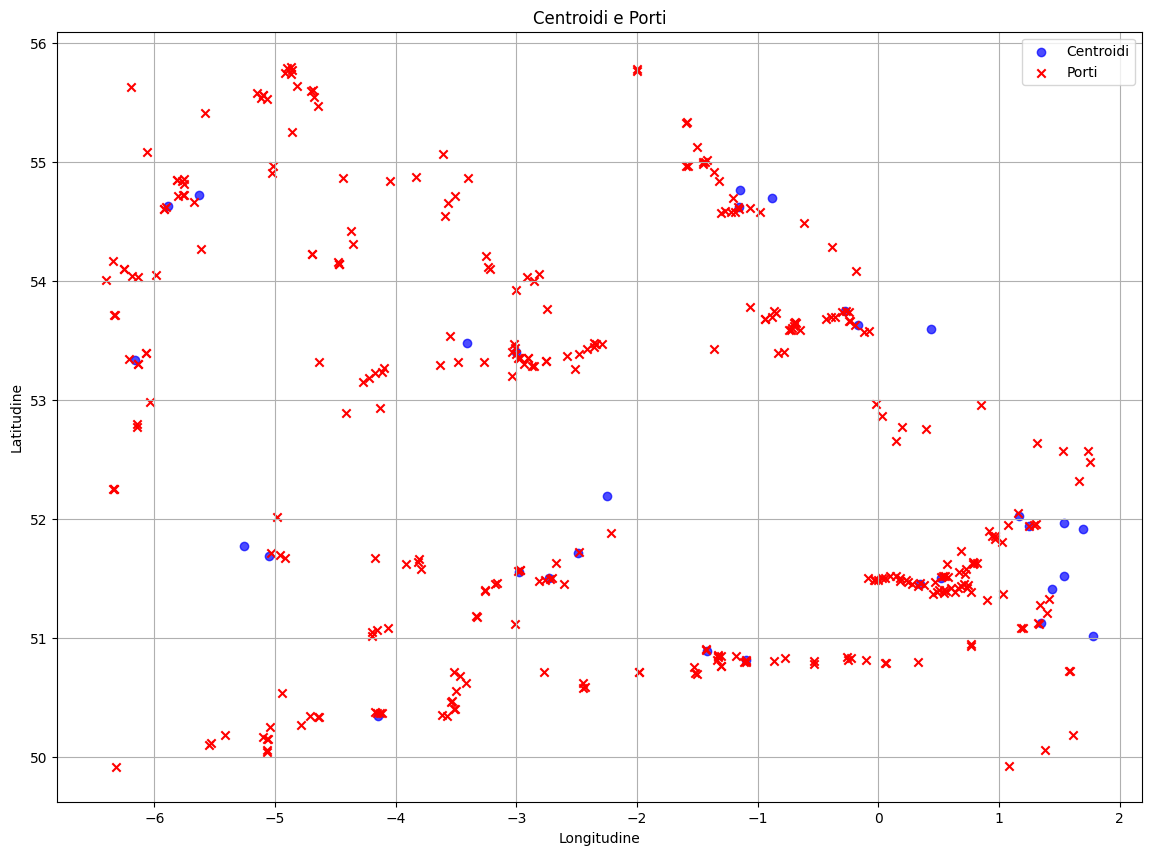

In [6]:
import matplotlib.pyplot as plt

# Creiamo una figura
plt.figure(figsize=(14, 10))

# Plot dei centroidi
plt.scatter(centroids['CENTROID_LONGITUDE'], centroids['CENTROID_LATITUDE'], 
            c='blue', marker='o', label='Centroidi', alpha=0.7)

# Plot dei porti
plt.scatter(ports['LONGITUDE'], ports['LATITUDE'], 
            c='red', marker='x', label='Porti')

# Aggiungi le etichette e il titolo
plt.xlabel('Longitudine')
plt.ylabel('Latitudine')
plt.title('Centroidi e Porti')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Funzioni

In [22]:
from sklearn.cluster import DBSCAN
import pandas as pd

def dbscan_clustering(stops, eps, min_samples):
    
    
    # Seleziona le colonne delle coordinate
    X = stops[['LONGITUDE', 'LATITUDE']].copy()
    
    # Esegui DBSCAN con i parametri forniti
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)
    
    # Aggiungi il cluster ottenuto al DataFrame 'stops'
    stops['cluster'] = clusters
    
    # Trova il centroide per ogni cluster escludendo il rumore (cluster -1)
    centroids = stops[stops['cluster'] != -1].groupby('cluster')[['LONGITUDE', 'LATITUDE']].mean().reset_index()
    centroids.rename(columns={'LONGITUDE': 'CENTROID_LONGITUDE', 'LATITUDE': 'CENTROID_LATITUDE'}, inplace=True)
    
    return centroids

from geopy.distance import geodesic
def calculate_precision_and_recall(centroids, ports, max_distance_nautical_miles=10):
    """
    Calcola la precisione e il richiamo per i centroidi dei cluster rispetto ai porti sulla base della distanza.

    Parametri:
    - centroids: DataFrame contenente i centroidi dei cluster con colonne 'CENTROID_LONGITUDE' e 'CENTROID_LATITUDE'.
    - ports: DataFrame contenente i dati dei porti con colonne 'LONGITUDE' e 'LATITUDE'.
    - max_distance_nautical_miles: La distanza massima in miglia nautiche per considerare un centroide vicino a un porto.

    Restituisce:
    - precision: Precisione calcolata come TP / (TP + FP).
    - recall: Richiamo calcolato come TP / (TP + FN).
    - tp_clusters: Lista dei cluster considerati True Positives.
    - fp_clusters: Lista dei cluster considerati False Positives.
    - fn_ports: Lista dei porti considerati False Negatives.
    - total_clusters: Numero totale di cluster analizzati.
    """
    # Soglia massima distanza in miglia nautiche (10 miglia nautiche corrispondono a circa 18.52 km)
    max_distance_km = max_distance_nautical_miles * 1.852  # Conversione da miglia nautiche a chilometri
    
    # Liste per salvare TP, FP e FN
    tp_clusters = []
    fp_clusters = []
    fn_ports = []
    
    # Funzione per calcolare la distanza tra due coordinate in km
    def distance_in_km(coord1, coord2):
        return geodesic(coord1, coord2).km

    # Verifica ogni centroide se ha un porto vicino entro 10 miglia nautiche (Precisione)
    for i, centroid in centroids.iterrows():
        cluster_coord = (centroid['CENTROID_LATITUDE'], centroid['CENTROID_LONGITUDE'])
        close_to_port = False
        
        # Controlla la distanza tra il centroide del cluster e ciascun porto
        for _, port in ports.iterrows():
            port_coord = (port['LATITUDE'], port['LONGITUDE'])
            distance = distance_in_km(cluster_coord, port_coord)
            
            if distance <= max_distance_km:
                close_to_port = True
                break
        
        if close_to_port:
            tp_clusters.append(centroid['cluster'])  # Aggiungi cluster ai True Positives
        else:
            fp_clusters.append(centroid['cluster'])  # Aggiungi cluster ai False Positives

    # Verifica ogni porto se ha un centroide vicino entro 10 miglia nautiche (Recall)
    for i, port in ports.iterrows():
        port_coord = (port['LATITUDE'], port['LONGITUDE'])
        close_to_cluster = False
        
        # Controlla la distanza tra il porto e ciascun centroide
        for _, centroid in centroids.iterrows():
            cluster_coord = (centroid['CENTROID_LATITUDE'], centroid['CENTROID_LONGITUDE'])
            distance = distance_in_km(port_coord, cluster_coord)
            
            if distance <= max_distance_km:
                close_to_cluster = True
                break
        
        if not close_to_cluster:
            fn_ports.append(port['PORT_CODE'])  # Aggiungi porto ai False Negatives

    # Calcola Precision e Recall
    tp = len(tp_clusters)
    fp = len(fp_clusters)
    fn = len(fn_ports)
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    total_clusters = tp + fp

    return precision, recall,total_clusters

   




In [21]:
ports

,PORT_NAME,PORT_CODE,CNTR_CODE3,geometry,LONGITUDE,LATITUDE
2,DUBLIN,DUB,IRL,POINT (-6.21248660686723 53.34366540273503),-6.212487,53.343665
17,HULL,HUL,GBR,POINT (-0.3033124561271129 53.73958879002699),-0.303312,53.739589
18,BELFAST,BEL,GBR,POINT (-5.900221431093693 54.62076381626103),-5.900221,54.620764
39,PLYMOUTH,PLY,GBR,POINT (-4.167825388782959 50.37448431602506),-4.167825,50.374484
43,PORTSMOUTH,PME,GBR,POINT (-1.09764029088652 50.81760682393043),-1.097640,50.817607
...,...,...,...,...,...,...
5061,BOULOGNE-SUR-MER,BOL_3,FRA,POINT (1.577514648 50.72509766),1.577515,50.725098
7520,SAINT-VALERY-SUR-SOMME,SAI_26,FRA,POINT (1.616667 50.183333),1.616667,50.183333
8002,HAMBLE,HAM_7,GBR,POINT (-1.326054 50.84947),-1.326054,50.849470
8003,HAMBLE,HAM_8,GBR,POINT (-1.329405 50.839118),-1.329405,50.839118


In [43]:
results = []
for e in tqdm(np.arange(0.0001, 0.1, 0.005)):
    for m in range(2, 50, 3):
        centroids = dbscan_clustering(stops, eps=e, min_samples=m)
        precision, recall,total_clusters = calculate_precision_and_recall(centroids, ports)
        
        # Aggiungi i risultati attuali alla lista
        results.append({
            'eps': e,
            'min_samples': m,
            'recall': recall,
            'total_clusters': total_clusters  # Numero totale di cluster
        })
results_df = pd.DataFrame(results)

results_df


  0%|          | 0/20 [00:05<?, ?it/s]


KeyboardInterrupt: 

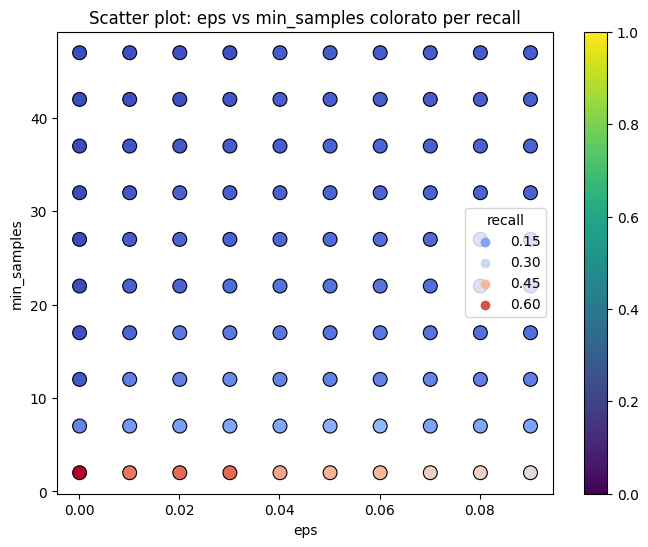

In [26]:
import seaborn as sns

# Crea un scatter plot con colore basato su precision
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    x='eps', 
    y='min_samples', 
    hue='recall', 
    data=results_df, 
    palette='coolwarm', 
    s=100, # dimensione dei punti
    edgecolor='black'
)

# Aggiunge una barra dei colori per la precision
plt.colorbar(scatter.collections[0])

# Titolo e etichette degli assi
plt.title('Scatter plot: eps vs min_samples colorato per recall')
plt.xlabel('eps')
plt.ylabel('min_samples')

# Mostra il grafico
plt.show()

In [ ]:
results_df = pd.DataFrame(results)
results_df.to_csv('/kaggle/working/grid_search_parameters.csv')

# Estrai i migliori parametri 

In [41]:
highest_recall_row = results_df.loc[results_df['recall'].idxmax()]
centroids = dbscan_clustering(stops, eps=highest_recall_row['eps'], min_samples=int(np.round(highest_recall_row['min_samples'])))
centroids.to_csv('/kaggle/working/best_centroids.csv')

,eps,min_samples,recall,total_clusters
0,0.0001,2,0.665169,305
1,0.0001,7,0.096667,29
2,0.0001,12,0.031949,10
3,0.0001,17,0.015773,5
4,0.0001,22,0.012461,4
...,...,...,...,...
95,0.0901,27,0.058824,15
96,0.0901,32,0.043307,12
97,0.0901,37,0.042969,12
98,0.0901,42,0.038023,11
